# FitzHugh-Nagumo Parameter Estimation Benchmarks
https://benchmarks.juliadiffeq.org/html/ParameterEstimation/FitzHughNagumoParameterEstimation.html

## Parameter estimation of FitzHugh-Nagumo model using optimisation methods

In [1]:
using ParameterizedFunctions, OrdinaryDiffEq, DiffEqParamEstim
using BlackBoxOptim, NLopt, Plots
# gr(fmt=:png)
pyplot(fmt=:png)

Plots.PyPlotBackend()

In [2]:
loc_bounds = Tuple{Float64,Float64}[(0, 1), (0, 1), (0, 1), (0, 1)]
glo_bounds = Tuple{Float64,Float64}[(0, 5), (0, 5), (0, 5), (0, 5)]
loc_init = [0.5,0.5,0.5,0.5]
glo_init = [2.5,2.5,2.5,2.5]

4-element Array{Float64,1}:
 2.5
 2.5
 2.5
 2.5

In [3]:
fitz = @ode_def FitzhughNagumo begin
  dv = v - v^3/3 -w + l
  dw = τinv*(v +  a - b*w)
end a b τinv l

(::FitzhughNagumo{var"#7#11",var"#8#12",var"#9#13",Nothing,Nothing,var"#10#14",Expr,Expr}) (generic function with 2 methods)

In [16]:
p = [0.7,0.8,0.08,0.5]              # Parameters used to construct the dataset
r0 = [1.0; 1.0]                     # initial value
tspan = (0.0, 30.0)                 # sample of 3000 observations over the (0,30) timespan
prob = ODEProblem(fitz, r0, tspan,p)
tspan2 = (0.0, 3.0)                 # sample of 300 observations with a timestep of 0.01
prob_short = ODEProblem(fitz, r0, tspan2,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 3.0)
u0: [1.0, 1.0]

In [17]:
dt = 30.0/3000
tf = 30.0
tinterval = 0:dt:tf
t  = collect(tinterval)

3001-element Array{Float64,1}:
  0.0 
  0.01
  0.02
  0.03
  0.04
  0.05
  0.06
  0.07
  0.08
  0.09
  0.1 
  0.11
  0.12
  ⋮   
 29.89
 29.9 
 29.91
 29.92
 29.93
 29.94
 29.95
 29.96
 29.97
 29.98
 29.99
 30.0 

In [18]:
h = 0.01
M = 300
tstart = 0.0
tstop = tstart + M * h
tinterval_short = 0:h:tstop
t_short = collect(tinterval_short)

301-element Array{Float64,1}:
 0.0 
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1 
 0.11
 0.12
 ⋮   
 2.89
 2.9 
 2.91
 2.92
 2.93
 2.94
 2.95
 2.96
 2.97
 2.98
 2.99
 3.0 

In [19]:
#Generate Data
data_sol_short = solve(prob_short,Vern9(),saveat=t_short,
    reltol=1e-9,abstol=1e-9)
data_short = convert(Array, data_sol_short) 
# This operation produces column major dataset obs as columns, equations as rows
data_sol = solve(prob,Vern9(),saveat=t,reltol=1e-9,abstol=1e-9)
data = convert(Array, data_sol)

2×3001 Array{Float64,2}:
 1.0  1.00166  1.00332  1.00497  1.00661  …  -0.65759   -0.655923  -0.654248
 1.0  1.00072  1.00144  1.00216  1.00289     -0.229157  -0.228976  -0.228793

## Plot of the solution
### Short Solution

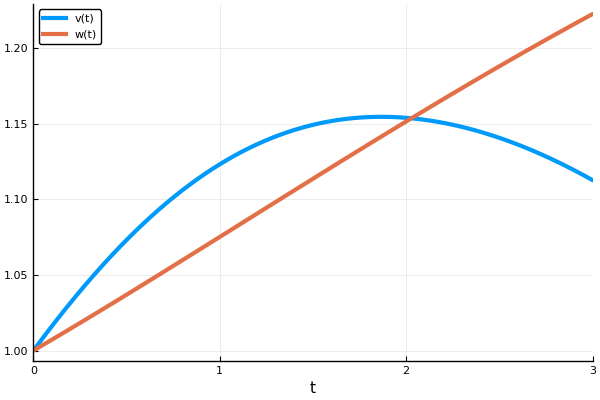

In [20]:
plot(data_sol_short)

## Longer Solution

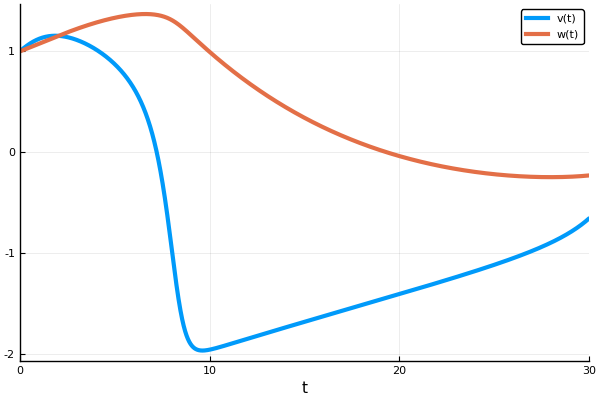

In [21]:
plot(data_sol)

# Local Solution from the short data set

In [22]:
obj_short = build_loss_objective(prob_short,Tsit5(),
    L2Loss(t_short,data_short),tstops=t_short)
res1 = bboptimize(obj_short;SearchRange = glo_bounds, MaxSteps = 7e3)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 2161 evals, 2008 steps, improv/step: 0.217 (last = 0.2171), fitness=0.050706362
1.00 secs, 4823 evals, 4670 steps, improv/step: 0.157 (last = 0.1119), fitness=0.000291958

Optimization stopped after 7001 steps and 1.39 seconds
Termination reason: Max number of steps (7000) reached
Steps per second = 5026.68
Function evals per second = 5135.10
Improvements/step = 0.14743
Total function evaluations = 7152


Best candidate found: [0.250243, 0.712843, 0.128416, 0.499714]

Fitness: 0.000088577



BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.5811121045512e9, 1.3927671909332275, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed => 787768,:SearchRange => Tuple{Float64,Float64}[(0.0, 5.0), (0.0, 5.0), (0.0, 5.0), (0.0, 5.0)],:MaxSteps => 7000),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme => ScalarFitnessScheme{true}(),:NumDimensions => :NotSpecified,:PopulationSize => 50,:MaxTime => 0.0,:SearchRange => (-1.0, 1.0),:Method => :adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals => 100,:RngSeed => 1234,:MaxFuncEvals => 0,:SaveTrace => false…)], 7152, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(8.857718863086664e-5, [0.2502427165351268, 0.7128434380753957, 0.12841566826402348, 0.4997143621416325]), BlackBoxOptim.PopulationOptimizerOutput{FitPopulation{Float64}}(FitPopulation{Float64}([0.24814987046865816 0.22681954070348018 …

In [23]:
# Lower tolerance could lead to smaller fitness (more accuracy)
obj_short = build_loss_objective(prob_short,Tsit5(),
    L2Loss(t_short,data_short),tstops=t_short,reltol=1e-9)
res1 = bboptimize(obj_short;SearchRange = glo_bounds, MaxSteps = 7e3)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 2660 evals, 2545 steps, improv/step: 0.211 (last = 0.2114), fitness=0.008357576
1.00 secs, 5545 evals, 5430 steps, improv/step: 0.153 (last = 0.1023), fitness=0.000968861

Optimization stopped after 7001 steps and 1.27 seconds
Termination reason: Max number of steps (7000) reached
Steps per second = 5520.25
Function evals per second = 5610.93
Improvements/step = 0.14029
Total function evaluations = 7116


Best candidate found: [0.304838, 0.727392, 0.120542, 0.499713]

Fitness: 0.000067405



BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.581112625297197e9, 1.2682387828826904, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed => 72827,:SearchRange => Tuple{Float64,Float64}[(0.0, 5.0), (0.0, 5.0), (0.0, 5.0), (0.0, 5.0)],:MaxSteps => 7000),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme => ScalarFitnessScheme{true}(),:NumDimensions => :NotSpecified,:PopulationSize => 50,:MaxTime => 0.0,:SearchRange => (-1.0, 1.0),:Method => :adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals => 100,:RngSeed => 1234,:MaxFuncEvals => 0,:SaveTrace => false…)], 7116, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(6.74047448477518e-5, [0.3048383377250155, 0.7273916455547363, 0.12054168569271584, 0.4997126493396949]), BlackBoxOptim.PopulationOptimizerOutput{FitPopulation{Float64}}(FitPopulation{Float64}([0.026686355121163186 0.2251511766989701 …

In [24]:
# Change in tolerance makes it worse
obj_short = build_loss_objective(prob_short,Vern9(),
    L2Loss(t_short,data_short),tstops=t_short,reltol=1e-9,abstol=1e-9)
res1 = bboptimize(obj_short;SearchRange = glo_bounds, MaxSteps = 7e3)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 1940 evals, 1830 steps, improv/step: 0.220 (last = 0.2202), fitness=0.079755789
1.00 secs, 3971 evals, 3861 steps, improv/step: 0.162 (last = 0.1088), fitness=0.003854692
1.50 secs, 5980 evals, 5870 steps, improv/step: 0.147 (last = 0.1180), fitness=0.001080289

Optimization stopped after 7001 steps and 1.78 seconds
Termination reason: Max number of steps (7000) reached
Steps per second = 3935.39
Function evals per second = 3997.22
Improvements/step = 0.14129
Total function evaluations = 7111


Best candidate found: [0.298384, 0.750388, 0.127442, 0.500594]

Fitness: 0.000237816



BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.581112849855603e9, 1.778986930847168, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed => 426703,:SearchRange => Tuple{Float64,Float64}[(0.0, 5.0), (0.0, 5.0), (0.0, 5.0), (0.0, 5.0)],:MaxSteps => 7000),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme => ScalarFitnessScheme{true}(),:NumDimensions => :NotSpecified,:PopulationSize => 50,:MaxTime => 0.0,:SearchRange => (-1.0, 1.0),:Method => :adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals => 100,:RngSeed => 1234,:MaxFuncEvals => 0,:SaveTrace => false…)], 7111, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(0.000237816421711772, [0.29838446292652754, 0.7503876015497299, 0.1274418025238577, 0.5005935827701767]), BlackBoxOptim.PopulationOptimizerOutput{FitPopulation{Float64}}(FitPopulation{Float64}([0.10637470238878956 0.001560908195388964